# 입문자를 위한, 파이썬/R 데이터 분석   

## Part(1) - Day02  :

-  Kaggle 소개 및 타이타닉 예제 실습 (Kaggle competition)
-  (초급분석) Titanic - Machine Learning from Disaster
-  Start here! Predict survival on the Titanic and get familiar with ML basics

- 캐글 가입 및 제출 참고 : https://brunch.co.kr/@hansungdev/12

- Kaggle Titanbic Competition : https://www.kaggle.com/c/titanic

## Import Package

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 유의사항 : 

1) Python 소스(본인의 titanic 주피터노트북 소스) 폴더경로에서, data_titanic 폴더 안에 train.csv 파일이 저장되어 있을 경우에 아래처럼 입력

2) 오류나면 철자 Spelling 확인, 또는 상단에 import pandas 등 실행했는지 점검

In [2]:
train = pd.read_csv("data_titanic/train.csv", index_col = "PassengerId")
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 11)

In [5]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
train["Sex"].groupby(train["Survived"]).value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

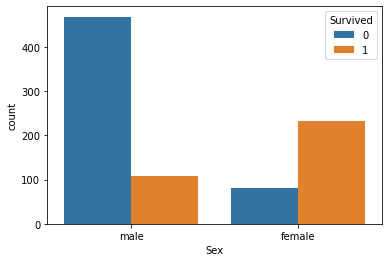

In [7]:
sns.countplot(data = train, x = "Sex", hue = "Survived")

In [8]:
train[['Sex', 'Survived']]

,Sex,Survived
PassengerId,,
1,male,0
2,female,1
3,female,1
4,female,1
5,male,0
...,...,...
887,male,0
888,female,1
889,female,0


In [11]:
pd.pivot_table(train, index = "Sex", values = "Survived")

,Survived
Sex,
female,0.742038
male,0.188908


In [25]:
test = pd.pivot_table(train, index = "Sex", values = "Survived")
test
test['Survived'] = test['Survived'] * 100
test['Survived'] = test['Survived'].apply(lambda x : f"{x:.2f}")
test

,Survived
Sex,
female,74.20
male,18.89


In [ ]:
# import warnings
# warnings.filterwarnings("ignore")

In [21]:
sns.__version__

'0.11.2'

<AxesSubplot:xlabel='Pclass', ylabel='count'>

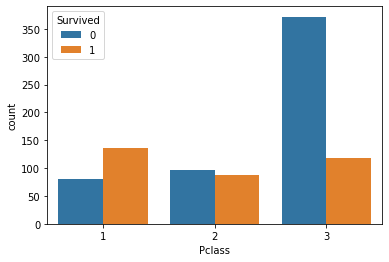

In [22]:
sns.countplot(data = train, x = "Pclass", hue = "Survived")

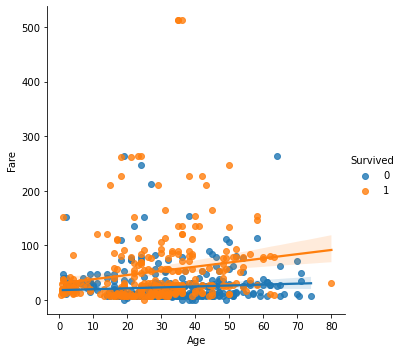

In [23]:
sns.lmplot(data = train, x = "Age", y = "Fare", hue = "Survived", fit_reg = True )

### Pre-processing

프로그램 encoding

In [26]:
# Sex (1: female, 0: male)
train["Sex"] == "male"

PassengerId
1       True
2      False
3      False
4      False
5       True
       ...  
887     True
888    False
889    False
890     True
891     True
Name: Sex, Length: 891, dtype: bool

In [27]:
train.loc[train["Sex"] == "male", "Sex_encode"] = 0

In [28]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [29]:
train.loc[train["Sex"] == "female", "Sex_encode"] = 1

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         714 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Ticket      891 non-null    object 
 8   Fare        891 non-null    float64
 9   Cabin       204 non-null    object 
 10  Embarked    889 non-null    object 
 11  Sex_encode  891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 90.5+ KB


In [36]:
train.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age           177
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Sex_encode      0
dtype: int64

In [37]:
test = train.copy()

In [40]:
test['Age'].mean()

29.699117647058763

In [38]:
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [39]:
test

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1.0
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0.0
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,1.0


## Upload test data

In [41]:
test = pd.read_csv("data_titanic/test.csv", index_col = "PassengerId")

In [42]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0


In [43]:
test#.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [44]:
test.shape

(418, 10)

In [45]:
test["Sex"] == 'male'
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1
test[["Sex", "Sex_encode"]].head()

,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


## Learning (Decision-tree)

참고 : [머신러닝 학습을 위한 데이터셋 분리(train,test,validation)](https://velog.io/@ljs7463/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%ED%95%99%EC%8A%B5%EC%9D%84-%EC%9C%84%ED%95%9C-%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B-%EB%B6%84%EB%A6%ACtraintestvalidation)

1. feature 선택
2. 예측결과를 정답과 비교하며 학습
3. 의사결정트리 생성

In [60]:
# Label : Survived ( Target Goal )
# Feature : using Columns while learning

label_name = "Survived"                         
feature_names = ["Pclass", "Sex_encode"] 

In [61]:
label_name

'Survived'

In [62]:
feature_names

['Pclass', 'Sex_encode']

In [63]:
train#.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0


In [64]:
X_train = train[feature_names]
X_train.head()

,Pclass,Sex_encode
PassengerId,,
1,3,0.0
2,1,1.0
3,3,1.0
4,1,1.0
5,3,0.0


In [65]:
X_test = test[feature_names]
X_test.tail()

,Pclass,Sex_encode
PassengerId,,
1305,3,0.0
1306,1,1.0
1307,3,0.0
1308,3,0.0
1309,3,0.0


In [66]:
y_train = train[label_name]
y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

### Machine Learning : scikit-learn

참고 : [머신러닝 - 결정 트리(Decision Tree)](https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-4-%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%ACDecision-Tree)

In [67]:
# fit : learning
# predict : forecast

from sklearn.tree import DecisionTreeClassifier

In [69]:
# max_depth : Depth number in DecisionTree
# random_state : 모델을 만드는 단계

model = DecisionTreeClassifier(max_depth = 3, random_state = 0)
model

DecisionTreeClassifier(max_depth=3, random_state=0)

### fit : learning by model

In [73]:
# X_train
# y_train

In [75]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [76]:
model.score(X_train, y_train)

0.7867564534231201

### 그럼, 동전 던지기로 예측...

In [77]:
import numpy as np

In [98]:
y_train

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [99]:
np.random.randint(0,2)

0

In [100]:
df = pd.DataFrame(np.random.randint(0, 2, size=(len(y_train), 1)), columns=['x'])
df

,x
0,1
1,0
2,1
3,0
4,0
...,...
886,1
887,0
888,0
889,1


In [101]:
y_guess = df['x']
y_guess

0      1
1      0
2      1
3      0
4      0
      ..
886    1
887    0
888    0
889    1
890    1
Name: x, Length: 891, dtype: int64

In [102]:
model.score(X_train, y_guess)

0.49158249158249157

In [112]:
!pip install graphviz

     |████████████████████████████████| 47 kB 5.3 MB/s eta 0:00:011


In [113]:
from sklearn.tree import export_graphviz
import graphviz

### (라이브러리) [Graphviz 설치 방법](https://zephyrus1111.tistory.com/123)

In [114]:
feature_names

['Pclass', 'Sex_encode']

In [115]:
export_graphviz(model,
                feature_names=feature_names,
                class_names=['Unsurvived','Survived'],
                out_file="data_titanic/decision-tree.dot")

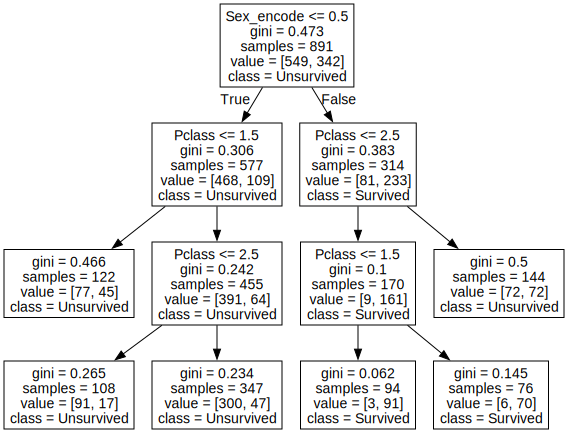

In [116]:
with open("data_titanic/decision-tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

### predict : prediction

In [104]:
#X_test

In [105]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [106]:
predictions = model.predict(X_test)

In [107]:
len(predictions)

418

In [108]:
X_test

,Pclass,Sex_encode
PassengerId,,
892,3,0.0
893,3,1.0
894,2,0.0
895,3,0.0
896,3,1.0
...,...,...
1305,3,0.0
1306,1,1.0
1307,3,0.0


## Submission

In [109]:
submission = pd.read_csv("data_titanic/gender_submission.csv", index_col="PassengerId")
submission.head()

,Survived
PassengerId,
892,1
893,0
894,1
895,1
896,0


In [110]:
submission["Survived"] = predictions
submission.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [111]:
submission.to_csv("data_titanic/submission_test.csv")

In [ ]:
# 캐글 제출 0.77 : 9000등 성능